In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 11.1 MB/s eta 0:00:00


In [ ]:
!pip install textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 68.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import pickle
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem.porter import *
import string
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as VS
from textstat.textstat import *
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [ ]:
dct = dict()

In [ ]:
df = pd.read_csv("11633_dataset (1).csv")

In [ ]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
1,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
2,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
3,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
4,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
...,...,...,...,...,...,...,...
11356,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
11357,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
11358,25295,6,0,6,0,1,youu got wild bitches tellin you lies
11359,25296,3,0,0,3,2,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...


In [ ]:
df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,11361.000000,11361.000000,11361.000000,11361.000000,11361.000000,11361.000000
mean,14719.827216,3.195141,0.660593,1.436141,1.098407,1.114603
std,8537.073093,0.799228,1.014128,1.434421,1.433133,0.777817
min,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6438.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,16981.000000,3.000000,0.000000,1.000000,0.000000,1.000000
75%,22545.000000,3.000000,2.000000,3.000000,3.000000,2.000000
max,25297.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [ ]:
df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

<Axes: >

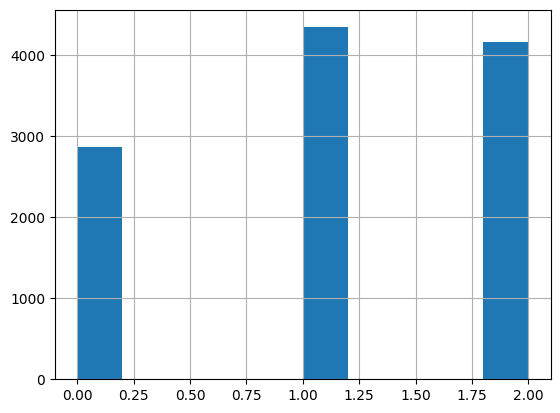

In [ ]:
df['class'].hist()

class
0    2860
1    4339
2    4162
Name: tweet, dtype: int64


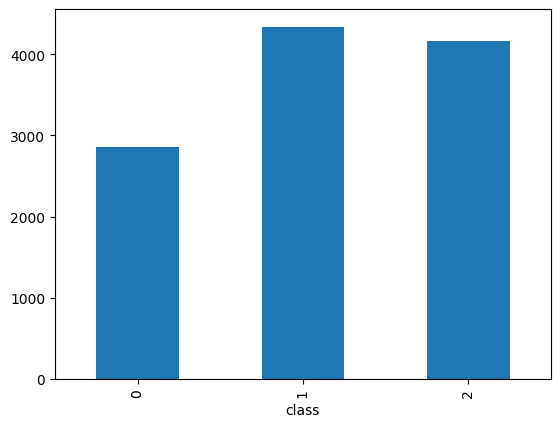

In [ ]:
print(df.groupby(['class'])['tweet'].count())
df.groupby(['class'])['tweet'].count().plot(kind="bar")
plt.show()

In [ ]:
tweets=df.tweet

In [ ]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,class.1
0,0,3,0,0,3,2,2
1,1,3,0,3,0,1,1
2,2,3,0,3,0,1,1
3,3,3,0,2,1,1,1
4,4,6,0,6,0,1,1
...,...,...,...,...,...,...,...
57565,16627,3,0,0,3,2,2
57566,14232,3,0,0,3,2,2
57567,16321,3,0,0,3,2,2
57568,5269,3,0,0,2,2,2


LSTM MODEL

In [ ]:
#@title
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
#@title
def embed_features(t, sen_len, vocal_size):
       onehot_repr = [one_hot(sen, vocal_size) for sen in t]
       embedded_docs = pad_sequences(onehot_repr, padding='pre', maxlen=sen_len)
       print(embedded_docs)
       return embedded_docs

In [ ]:
#@title
voc_size = 5000
s_len = 20
embedded_docs = embed_features(df['tweet'], vocal_size=voc_size, sen_len=s_len)

[[ 955 3353 4363 ...  893  383 4026]
 [   0    0    0 ... 2965 3634  463]
 [3046 1513 2155 ... 3665 2245 4319]
 ...
 [   0    0    0 ... 2000  516 4746]
 [   0    0    0 ... 3634 1231 4366]
 [   0    0    0 ... 2975 1835  325]]


In [ ]:
#@title
X_lstm = np.array(embedded_docs)
Y_lstm = np.array(df['class'])

In [ ]:
#@title
embedded_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size, embedded_vector_features, input_length=s_len))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

#Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            200000    
                                                                 
 dropout_2 (Dropout)         (None, 20, 40)            0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               56400     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#@title
#Spliting the data into training and testing data
from sklearn.model_selection import train_test_split
X_lstm_train, X_lstm_test, Y_lstm_train, Y_lstm_test = train_test_split(X_lstm, Y_lstm, test_size=0.20, random_state=42)

In [ ]:
#@title
history = model.fit(X_lstm_train, Y_lstm_train, validation_data=(X_lstm_test, Y_lstm_test), epochs=10, batch_size=64)

Epoch 1/10
142/142 [==============================] - 15s 85ms/step - loss: -1.5042 - accuracy: 0.3825 - val_loss: -2.8613 - val_accuracy: 0.3806
Epoch 2/10
142/142 [==============================] - 4s 29ms/step - loss: -2.8981 - accuracy: 0.3823 - val_loss: -4.1644 - val_accuracy: 0.3806
Epoch 3/10
142/142 [==============================] - 2s 16ms/step - loss: -4.0569 - accuracy: 0.3823 - val_loss: -5.4959 - val_accuracy: 0.3806
Epoch 4/10
142/142 [==============================] - 3s 18ms/step - loss: -5.1384 - accuracy: 0.3823 - val_loss: -6.8044 - val_accuracy: 0.3806
Epoch 5/10
142/142 [==============================] - 2s 12ms/step - loss: -6.2147 - accuracy: 0.3823 - val_loss: -8.1179 - val_accuracy: 0.3806
Epoch 6/10
142/142 [==============================] - 3s 17ms/step - loss: -7.2883 - accuracy: 0.3823 - val_loss: -9.3907 - val_accuracy: 0.3806
Epoch 7/10
142/142 [==============================] - 1s 9ms/step - loss: -8.2660 - accuracy: 0.3823 - val_loss: -10.6364 - val_a

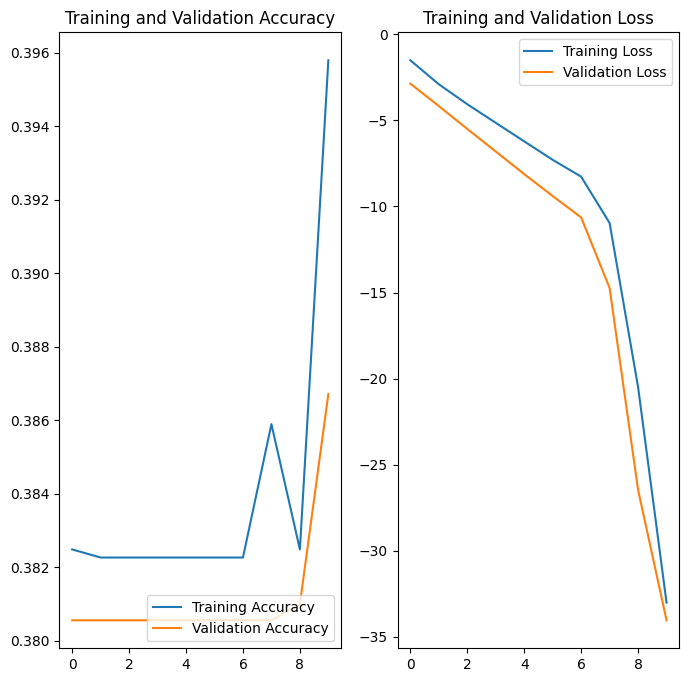

In [ ]:
#@title
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#@title
model.save("model_h1.h5")

In [ ]:
#@title
model.evaluate(X_lstm_test, Y_lstm_test)

72/72 [==============================] - 0s 3ms/step - loss: -34.0415 - accuracy: 0.3867


[-34.04153823852539, 0.38671359419822693]

In [ ]:
#@title
# Function to plot the confusion matrix
# (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)


from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

72/72 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[203 351   0]
 [189 676   0]
 [ 11 843   0]]
0.38671359436867575


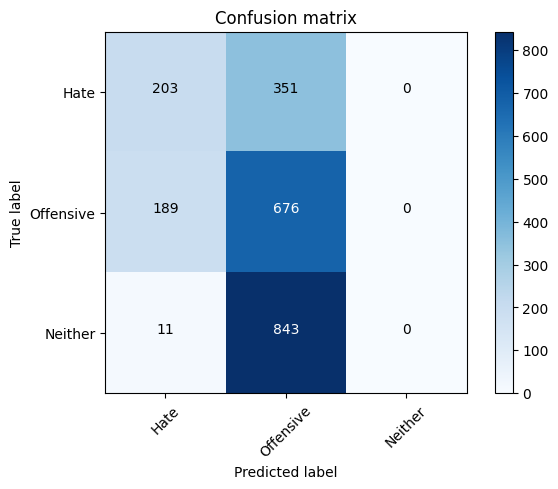

In [ ]:
#@title
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
Y_lstm_predict = (model.predict(X_lstm_test) > 0.5).astype("int32");
c_matix = confusion_matrix(Y_lstm_test, Y_lstm_predict)
plot_confusion_matrix(c_matix, classes=['Hate', 'Offensive','Neither'])
accuracy = accuracy_score(Y_lstm_test, Y_lstm_predict)
print(c_matix)
print(accuracy)
dct['LSTM'] = round(accuracy*100,2)

LOGISTIC + PIPELINE

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords=stopwords = nltk.corpus.stopwords.words("english")

other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)

stemmer = PorterStemmer()


def preprocess(text_string):
    """
    Accepts a text string and replaces:
    1) urls with URLHERE
    2) lots of whitespace with one instance
    3) mentions with MENTIONHERE

    This allows us to get standardized counts of urls and mentions
    Without caring about specific people mentioned
    """
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', text_string)
    parsed_text = re.sub(giant_url_regex, '', parsed_text)
    parsed_text = re.sub(mention_regex, '', parsed_text)
    return parsed_text

def tokenize(tweet):
    """Removes punctuation & excess whitespace, sets to lowercase,
    and stems tweets. Returns a list of stemmed tokens."""
    tweet = " ".join(re.split("[^a-zA-Z]*", tweet.lower())).strip()
    tokens = [stemmer.stem(t) for t in tweet.split()]
    return tokens

def basic_tokenize(tweet):
    """Same as tokenize but without the stemming"""
    tweet = " ".join(re.split("[^a-zA-Z.,!?]*", tweet.lower())).strip()
    return tweet.split()

vectorizer = TfidfVectorizer(
    tokenizer=tokenize,
    preprocessor=preprocess,
    ngram_range=(1, 3),
    stop_words=stopwords,
    use_idf=True,
    smooth_idf=False,
    norm=None,
    decode_error='replace',
    max_features=10000,
    min_df=5,
    max_df=0.75
    )


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#Construct tfidf matrix and get relevant scores
tfidf = vectorizer.fit_transform(tweets).toarray()
vocab = {v:i for i, v in enumerate(vectorizer.get_feature_names_out())}
idf_vals = vectorizer.idf_
idf_dict = {i:idf_vals[i] for i in vocab.values()} #keys are indices; values are IDF scores

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'e', 'f', 'g', 'h', 'j', 'l', 'n', 'p', 'r', 'u', 'v', 'w'] not in stop_words.
  warnings.warn(


In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
#Get POS tags for tweets and save as a string
tweet_tags = []
for t in tweets:
    tokens = basic_tokenize(preprocess(t))
    tags = nltk.pos_tag(tokens)
    tag_list = [x[1] for x in tags]
    tag_str = " ".join(tag_list)
    tweet_tags.append(tag_str)

In [ ]:
#We can use the TFIDF vectorizer to get a token matrix for the POS tags
pos_vectorizer = TfidfVectorizer(
    tokenizer=None,
    lowercase=False,
    preprocessor=None,
    ngram_range=(1, 3),
    stop_words=None,
    use_idf=False,
    smooth_idf=False,
    norm=None,
    decode_error='replace',
    max_features=5000,
    min_df=5,
    max_df=0.75,
    )

In [ ]:
#Construct POS TF matrix and get vocab dict
pos = pos_vectorizer.fit_transform(pd.Series(tweet_tags)).toarray()
pos_vocab = {v:i for i, v in enumerate(pos_vectorizer.get_feature_names_out())}

In [ ]:
#Now get other features
sentiment_analyzer = VS()

def count_twitter_objs(text_string):
    """
    Accepts a text string and replaces:
    1) urls with URLHERE
    2) lots of whitespace with one instance
    3) mentions with MENTIONHERE
    4) hashtags with HASHTAGHERE

    This allows us to get standardized counts of urls and mentions
    Without caring about specific people mentioned.

    Returns counts of urls, mentions, and hashtags.
    """
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    hashtag_regex = '#[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', text_string)
    parsed_text = re.sub(giant_url_regex, 'URLHERE', parsed_text)
    parsed_text = re.sub(mention_regex, 'MENTIONHERE', parsed_text)
    parsed_text = re.sub(hashtag_regex, 'HASHTAGHERE', parsed_text)
    return(parsed_text.count('URLHERE'),parsed_text.count('MENTIONHERE'),parsed_text.count('HASHTAGHERE'))

def other_features(tweet):
    """This function takes a string and returns a list of features.
    These include Sentiment scores, Text and Readability scores,
    as well as Twitter specific features"""
    sentiment = sentiment_analyzer.polarity_scores(tweet)

    words = preprocess(tweet) #Get text only

    syllables = textstat.syllable_count(words)
    num_chars = sum(len(w) for w in words)
    num_chars_total = len(tweet)
    num_terms = len(tweet.split())
    num_words = len(words.split())
    avg_syl = round(float((syllables+0.001))/float(num_words+0.001),4)
    num_unique_terms = len(set(words.split()))

    ###Modified FK grade, where avg words per sentence is just num words/1
    FKRA = round(float(0.39 * float(num_words)/1.0) + float(11.8 * avg_syl) - 15.59,1)
    ##Modified FRE score, where sentence fixed to 1
    FRE = round(206.835 - 1.015*(float(num_words)/1.0) - (84.6*float(avg_syl)),2)

    twitter_objs = count_twitter_objs(tweet)
    retweet = 0
    if "rt" in words:
        retweet = 1
    features = [FKRA, FRE,syllables, avg_syl, num_chars, num_chars_total, num_terms, num_words,
                num_unique_terms, sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound'],
                twitter_objs[2], twitter_objs[1],
                twitter_objs[0], retweet]
    #features = pandas.DataFrame(features)
    return features

def get_feature_array(tweets):
    feats=[]
    for t in tweets:
        feats.append(other_features(t))
    return np.array(feats)

In [ ]:
other_features_names = ["FKRA", "FRE","num_syllables", "avg_syl_per_word", "num_chars", "num_chars_total", \
                        "num_terms", "num_words", "num_unique_words", "vader neg","vader pos","vader neu", \
                        "vader compound", "num_hashtags", "num_mentions", "num_urls", "is_retweet"]

In [ ]:
feats = get_feature_array(tweets)

In [ ]:
#Now join them all up
M = np.concatenate([tfidf,pos,feats],axis=1)

In [ ]:
M.shape

(11361, 3476)

In [ ]:
#Finally get a list of variable names
variables = ['']*len(vocab)
for k,v in vocab.items():
    variables[v] = k

pos_variables = ['']*len(pos_vocab)
for k,v in pos_vocab.items():
    pos_variables[v] = k

feature_names = variables+pos_variables+other_features_names

In [ ]:
X = pd.DataFrame(M)
y = df['class'].astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline(
        [('select', SelectFromModel(LogisticRegression(class_weight='balanced',
                                                  penalty="l1", C=0.01))),
        ('model', LogisticRegression(class_weight='balanced',penalty='l2'))])

In [ ]:
param_grid = [{}] # Optionally add parameters here

In [ ]:
grid_search = GridSearchCV(pipe,
                           param_grid,
                           cv=StratifiedKFold(n_splits=5,
                                              random_state=42,shuffle = True).split(X_train, y_train),
                           verbose=2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Create pipeline
pipe = Pipeline([
    ('classifier', LogisticRegression(penalty='l1', solver='saga', max_iter=30))
])

# Define parameter grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
}




In [ ]:

# Create grid search object
grid_search = GridSearchCV(pipe, param_grid, cv=5)

In [ ]:

# Fit on training data
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        LogisticRegression(max_iter=30,
                                                           penalty='l1',
                                                           solver='saga'))]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100]})

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7572559366754618


In [ ]:
y_preds = best_model.predict(X_test)

In [ ]:
report = classification_report( y_test, y_preds )

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.77      0.57      0.65       292
           1       0.74      0.81      0.77       415
           2       0.77      0.84      0.80       430

    accuracy                           0.76      1137
   macro avg       0.76      0.74      0.74      1137
weighted avg       0.76      0.76      0.75      1137



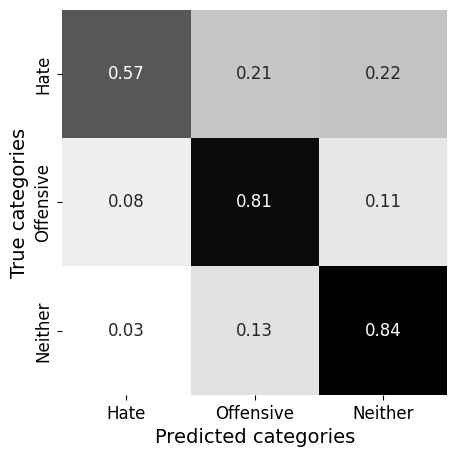

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='gist_gray_r',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)
dct['LR+PIPELINE'] = round(accuracy*100,2)

#Uncomment line below if you want to save the output
#plt.savefig('confusion.pdf')

<Axes: >

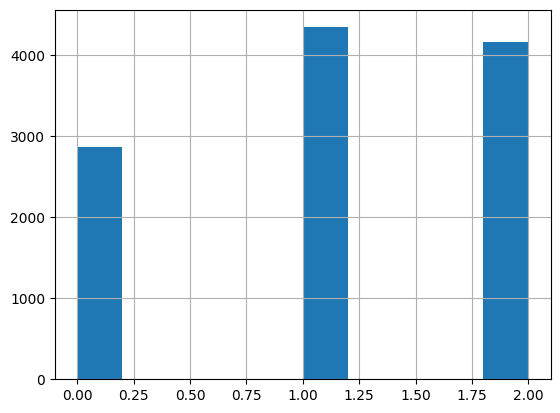

In [ ]:
#True distribution
y.hist()

<Axes: >

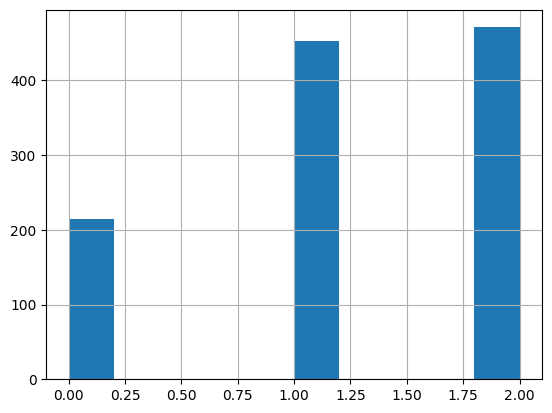

In [ ]:
pd.Series(y_preds).hist()

In [ ]:
df['tweet'] = df['tweet'].apply(lambda x: x.lower())
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,2,3,0,3,0,1,!!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...
1,3,3,0,2,1,1,!!!!!!!!! rt @c_g_anderson: @viva_based she lo...
2,4,6,0,6,0,1,!!!!!!!!!!!!! rt @shenikaroberts: the shit you...
3,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@t_madison_x: the shit just..."
4,6,3,0,3,0,1,"!!!!!!""@__brighterdays: i can not just sit up ..."


In [ ]:

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

df['tweet'] = df['tweet'].apply(punctuation_removal)
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,2,3,0,3,0,1,rt urkindofbrand dawg rt 80sbaby4life you eve...
1,3,3,0,2,1,1,rt cganderson vivabased she look like a tranny
2,4,6,0,6,0,1,rt shenikaroberts the shit you hear about me ...
3,5,3,1,2,0,1,tmadisonx the shit just blows meclaim you so f...
4,6,3,0,3,0,1,brighterdays i can not just sit up and hate on...


DATA SPLIT

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df['tweet'],df['class'], test_size=0.20, random_state=21)


NAIVE BAYES

In [ ]:
# 1. Naive Bayes

from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])


# Fitting the model
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)

# Accuracy
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 77.34%


F1 score: 0.7681951699852418
Recall: 0.7734271887373515
Precision: 0.8181036390741775
Confusion matrix, without normalization


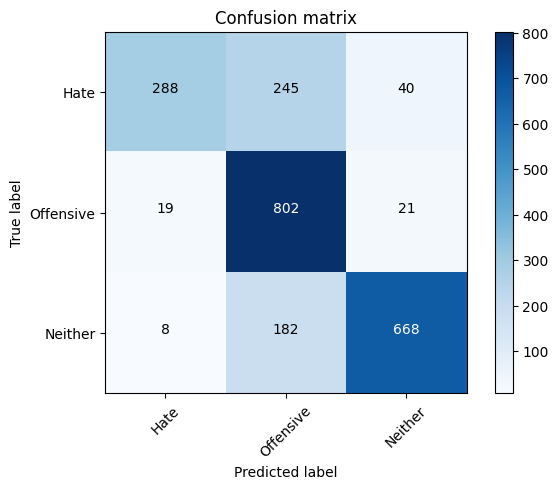

In [ ]:
# confusion matrix for Naive Bayes
from sklearn.metrics import f1_score, recall_score, precision_score
print('F1 score:', f1_score(y_test, prediction,average='weighted'))
print('Recall:', recall_score(y_test, prediction,
                              average='weighted'))
print('Precision:', precision_score(y_test, prediction,
                                    average='weighted'))
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Hate', 'Offensive','Neither'])

DECISION TREE

In [ ]:

from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20,
                                           splitter='best',
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 81.92%


F1 score: 0.8145045444079123
Recall: 0.8191816981962164
Precision: 0.8225647549008144
Confusion matrix, without normalization


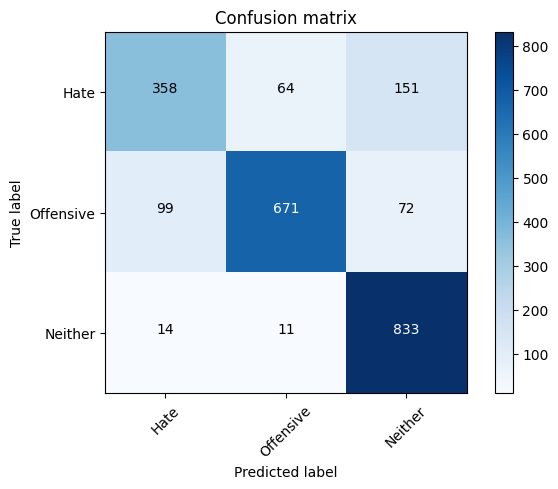

In [ ]:
# confusion matrix for Decision Tree
from sklearn.metrics import f1_score, recall_score, precision_score
print('F1 score:', f1_score(y_test, prediction,average='weighted'))
print('Recall:', recall_score(y_test, prediction,
                              average='weighted'))
print('Precision:', precision_score(y_test, prediction,
                                    average='weighted'))
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Hate', 'Offensive','Neither'])

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 91.25%


F1 score: 0.9125290673907185
Recall: 0.9124505059392873
Precision: 0.9127351483611732
Confusion matrix, without normalization


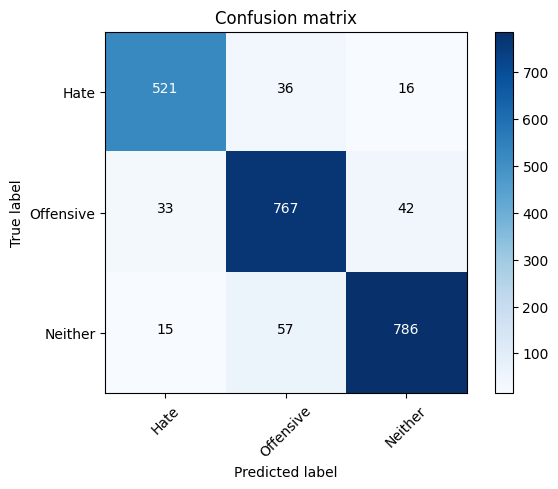

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score
print('F1 score:', f1_score(y_test, prediction,average='weighted'))
print('Recall:', recall_score(y_test, prediction,
                              average='weighted'))
print('Precision:', precision_score(y_test, prediction,
                                    average='weighted'))

cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Hate', 'Offensive','Neither'])

([<matplotlib.axis.YTick at 0x7f481ea25b80>,
 [Text(0, 50, '50'),
  Text(0, 60, '60'),
  Text(0, 70, '70'),
  Text(0, 80, '80'),
  Text(0, 90, '90'),
  Text(0, 100, '100')])

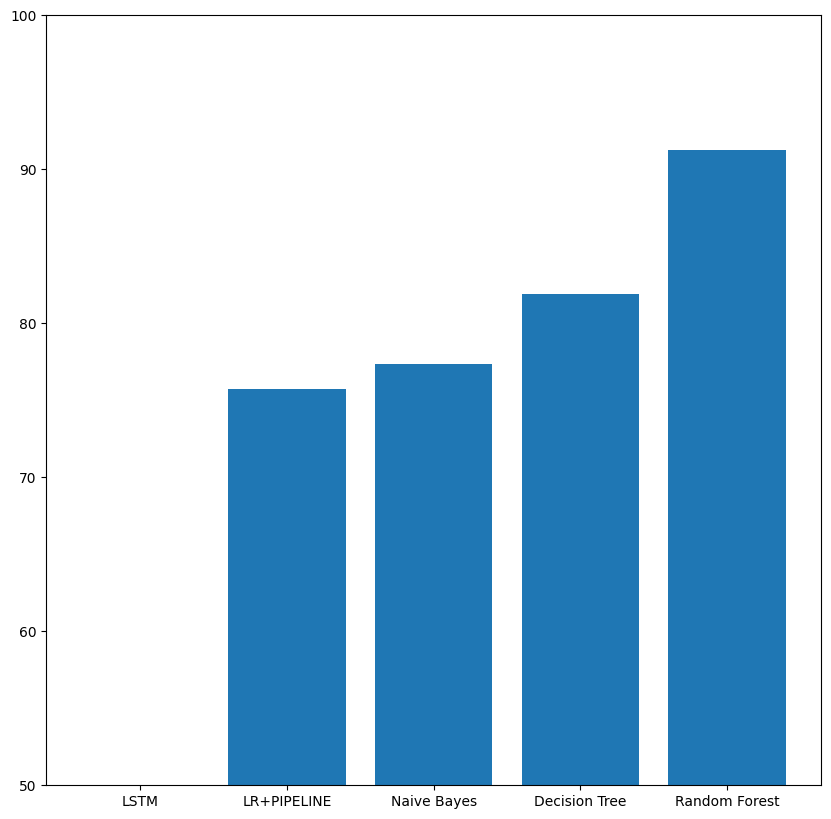

In [ ]:
plt.figure(figsize=(10,10))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(50,100)
plt.yticks((50, 60, 70, 80, 90, 100))